00392


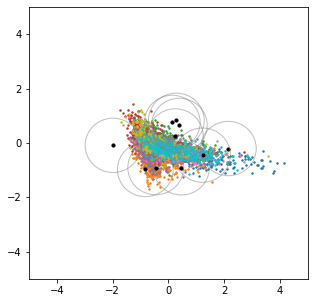

00784


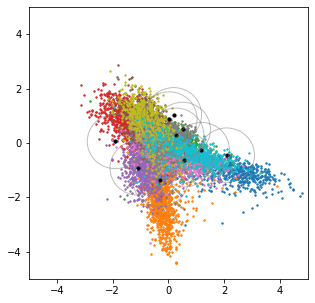

01176


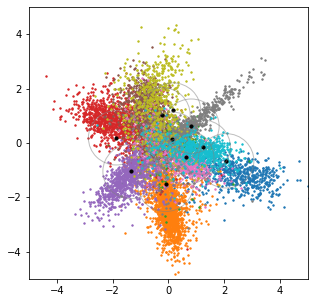

01568


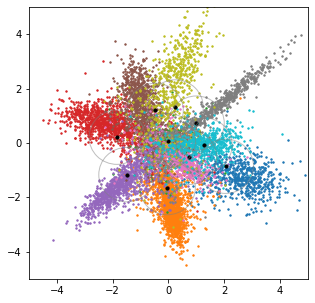

01960


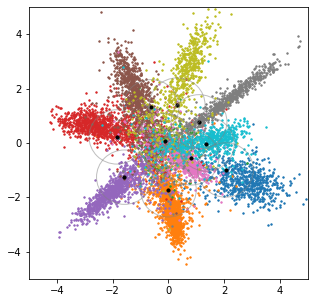

In [4]:
"""
Create visualizations of saved tensorboard embeddings

ffmpeg -f image2 -framerate 3 -i "000%02d.png"  -vf palettegen palette.png
ffmpeg  -framerate 3 -i "000%02d.png" -i palette.png -lavfi paletteuse -vf scale=500x500 out.gif
"""
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from os import listdir
from os.path import join, isdir, exists

import numpy as np
import pandas as pd

root = "/home/ki/projects/work/mchad/logs/runs/2022-04-08/08-59-20/tb/version_0/"

l = listdir(root)
l.sort()

for f in l:
    if not isdir(join(root, f)):
        continue

    p = join(root, f, "train", "tensors.tsv")

    if not exists(p):
        continue

    tensors = pd.read_csv(p, delimiter="\t", header=None)
    p = join(root, f, "train", "metadata.tsv")
    meta = pd.read_csv(p, delimiter="\t")

    print(f)
    fig, ax = plt.subplots(figsize=(5,5))

    for i in [t for t in np.unique((meta["labels"])) if t < 0]:
        idx = meta["labels"].values == i
        data = tensors[idx]
        ax.scatter(x=data.values[:,0], y=data.values[:,1], label=str(i), s=1, c="black", marker="x")

    for i in [t for t in np.unique((meta["labels"])) if t >= 0]:
        idx = meta["labels"].values == i
        data = tensors[idx]
        ax.scatter(x=data.values[:,0], y=data.values[:,1], label=str(i), s=2, cmap="tab20")

    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)

    p = join(root, f, "centers", "tensors.tsv")
    tensors = pd.read_csv(p, delimiter="\t", header=None)
    data = tensors
    ax.scatter(x=data.values[:,0], y=data.values[:,1], label=str(i), s=10, c="black", marker="o")

    for x,y in data.values:
        circ = Circle( (x, y), 1.0 , fill = False,  color="gray", alpha=0.5)
        ax.add_patch(circ)

    # plt.legend()
    # plt.savefig(f"/home/ki/tmp/pic/{f}.png", dpi=300)
    plt.show()

In [ ]:
np.unique((meta["labels"]))

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
idx = meta["labels"].values == -1
data = tensors[idx]
ax.scatter(x=data.values[:,0], y=data.values[:,1], label="-1", s=1, c="gray", alpha=0.5)

for i in [f for f in range(0, 10)]:
    idx = meta["labels"].values == i
    data = tensors[idx]
    ax.scatter(x=data.values[:,0], y=data.values[:,1], label=str(i), s=2)
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)

plt.legend()
plt.show()